In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv('Customer Purchasing Behaviors.csv')
print(df.head())

   user_id  age  annual_income  purchase_amount  loyalty_score region  \
0        1   25          45000              200            4.5  North   
1        2   34          55000              350            7.0  South   
2        3   45          65000              500            8.0   West   
3        4   22          30000              150            3.0   East   
4        5   29          47000              220            4.8  North   

   purchase_frequency  
0                  12  
1                  18  
2                  22  
3                  10  
4                  13  


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB
None


In [20]:
print(df.describe())

          user_id         age  annual_income  purchase_amount  loyalty_score  \
count  238.000000  238.000000     238.000000       238.000000     238.000000   
mean   119.500000   38.676471   57407.563025       425.630252       6.794118   
std     68.848868    9.351118   11403.875717       140.052062       1.899047   
min      1.000000   22.000000   30000.000000       150.000000       3.000000   
25%     60.250000   31.000000   50000.000000       320.000000       5.500000   
50%    119.500000   39.000000   59000.000000       440.000000       7.000000   
75%    178.750000   46.750000   66750.000000       527.500000       8.275000   
max    238.000000   55.000000   75000.000000       640.000000       9.500000   

       purchase_frequency  
count          238.000000  
mean            19.798319  
std              4.562884  
min             10.000000  
25%             17.000000  
50%             20.000000  
75%             23.000000  
max             28.000000  


In [21]:
# print unique counts of each column
for col in df.columns:
    print(col, df[col].nunique())

# print unique values of each column
for col in df.columns:
    print(col, df[col].unique())


user_id 238
age 34
annual_income 36
purchase_amount 36
loyalty_score 35
region 4
purchase_frequency 19
user_id [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 

In [22]:
print(df['region'].unique())

['North' 'South' 'West' 'East']


In [23]:
# count of each unique value in region column
print(df['region'].value_counts())

region
North    78
South    77
West     77
East      6
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

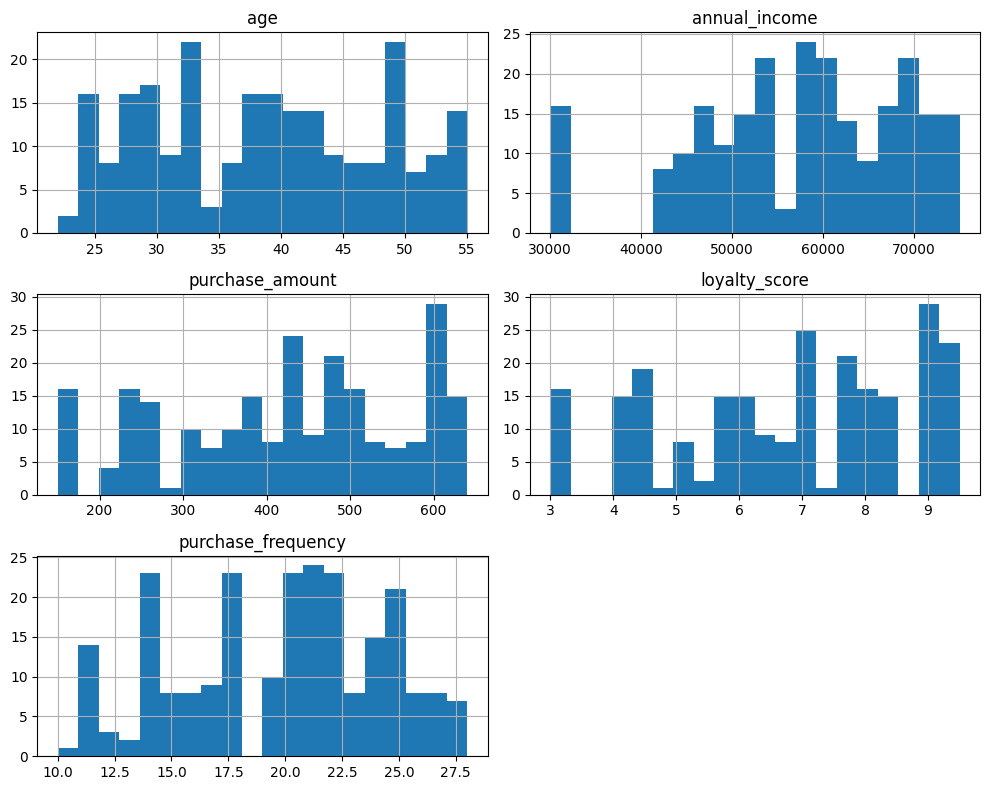

In [24]:
# Distribution of Numeric Features
plt.figure(figsize=(10, 6))
# remove user id column from the histogram
# dont frop from dataframe
df.drop('user_id', axis=1).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

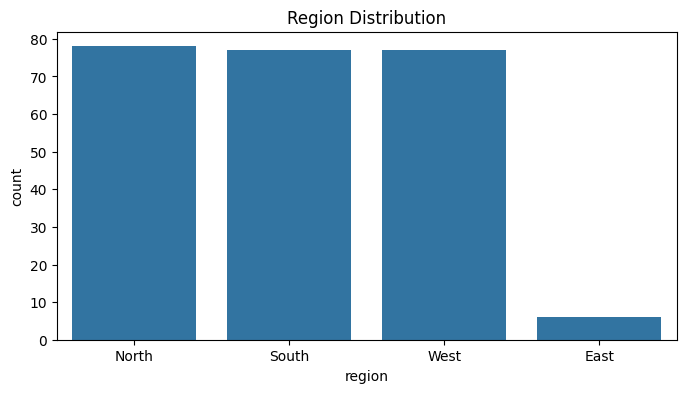

In [25]:
# Distribution of Categorical Feature (Region)
plt.figure(figsize=(8, 4))
sns.countplot(x='region', data=df)
plt.title('Region Distribution')
plt.show()

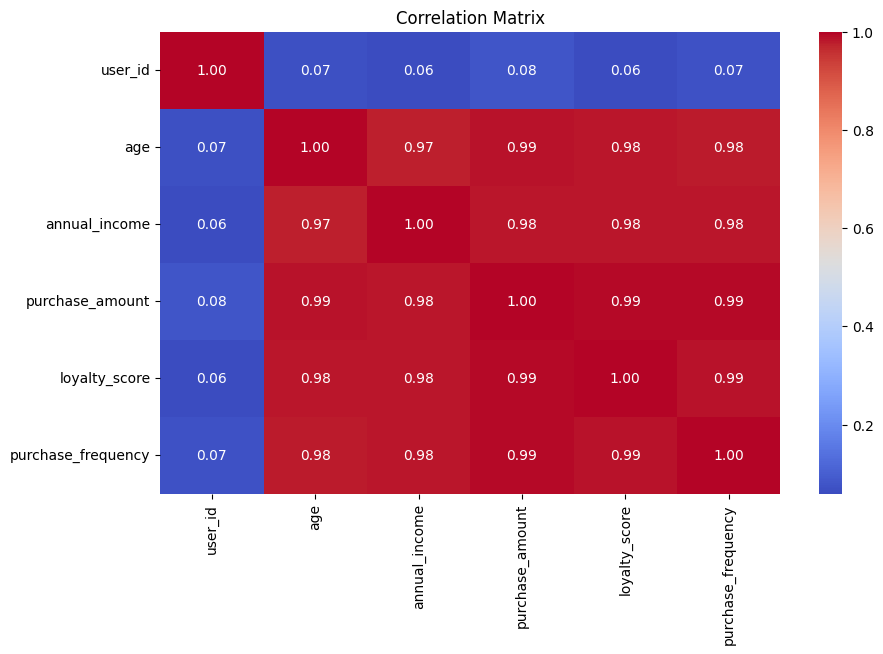

In [26]:
# Correlation Matrix (For Numeric Variables)
plt.figure(figsize=(10, 6))

# Select only numeric columns (exclude 'region' or other non-numeric columns)
numeric_df = df.select_dtypes(include='number')  # This selects only numeric columns

correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


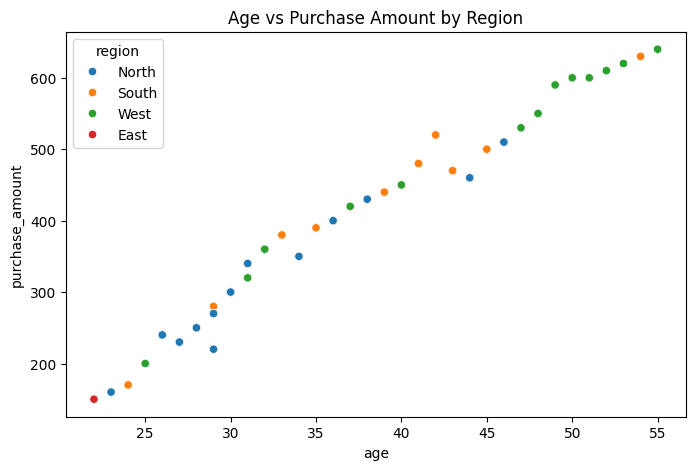

In [27]:
# Scatter Plot to Show Relationship Between Age and Purchase Amount
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='purchase_amount', hue='region', data=df)
plt.title('Age vs Purchase Amount by Region')
plt.show()

In [28]:
# Aggregating Data by Region (Mean of Numeric Features)
print("\nMean Values Grouped by Region:")
print(df.groupby('region').mean())


Mean Values Grouped by Region:
           user_id        age  annual_income  purchase_amount  loyalty_score  \
region                                                                         
East     16.833333  31.666667   49000.000000       320.000000       5.400000   
North   122.141026  34.358974   53038.461538       358.589744       5.865385   
South   121.649351  38.000000   55766.233766       416.883117       6.725974   
West    122.675325  44.272727   64129.870130       510.519481       7.911688   

        purchase_frequency  
region                      
East             16.666667  
North            17.653846  
South            19.467532  
West             22.545455  


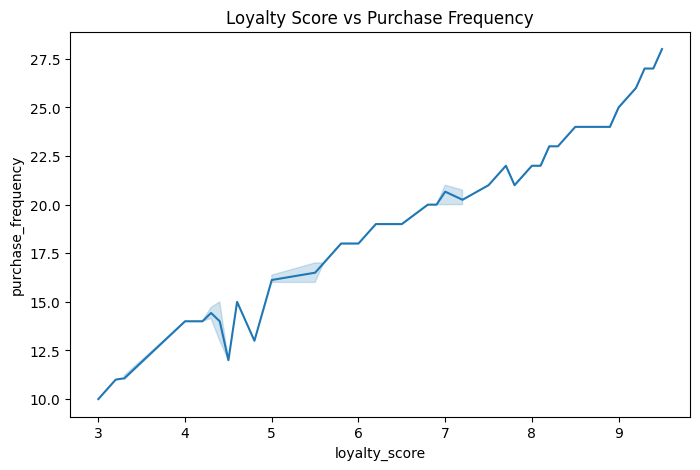

In [29]:
# Visualizing the Relationship Between Loyalty Score and Purchase Frequency
plt.figure(figsize=(8, 5))
sns.lineplot(x='loyalty_score', y='purchase_frequency', data=df)
plt.title('Loyalty Score vs Purchase Frequency')
plt.show()

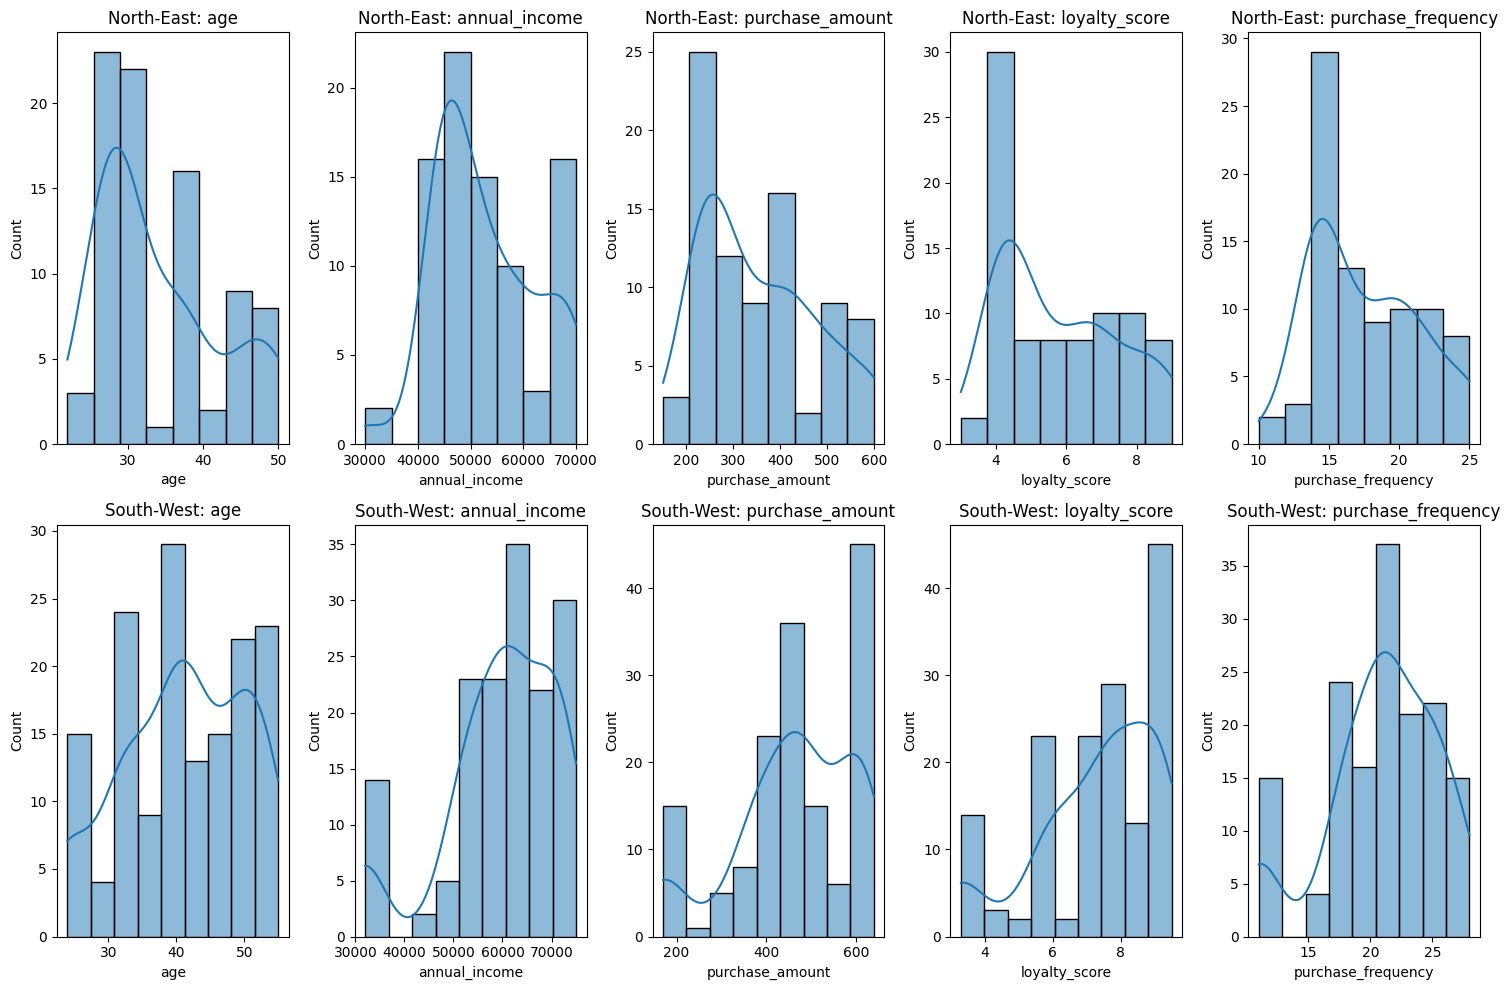

In [35]:
# Distribution of all numeric features
df = pd.read_csv('Customer Purchasing Behaviors.csv')
grouped = df.drop(columns=['user_id']).groupby(df['region'].map(lambda x: 'North-East' if x in ['North', 'East'] else 'South-West'))
numeric_columns = df.drop(columns=['user_id']).select_dtypes(include='number')
df1 = grouped.get_group('North-East')[numeric_columns.columns]
df2= grouped.get_group('South-West')[numeric_columns.columns]


fig, ax = plt.subplots(2, 5, figsize=(15, 10))

for i, col in enumerate(df1.columns):
    sns.histplot(df1[col], ax=ax[0, i], kde=True)
    ax[0, i].set_title(f'North-East: {col}')

for i, col in enumerate(df2.columns):
    sns.histplot(df2[col], ax=ax[1, i], kde=True)
    ax[1, i].set_title(f'South-West: {col}')

plt.tight_layout()
plt.show()

# plt.figure(figsize=(8, 5))
# sns.histplot(df['purchase_amount'], kde=True)
# plt.title('Distribution of Purchase Amount')
# plt.show()

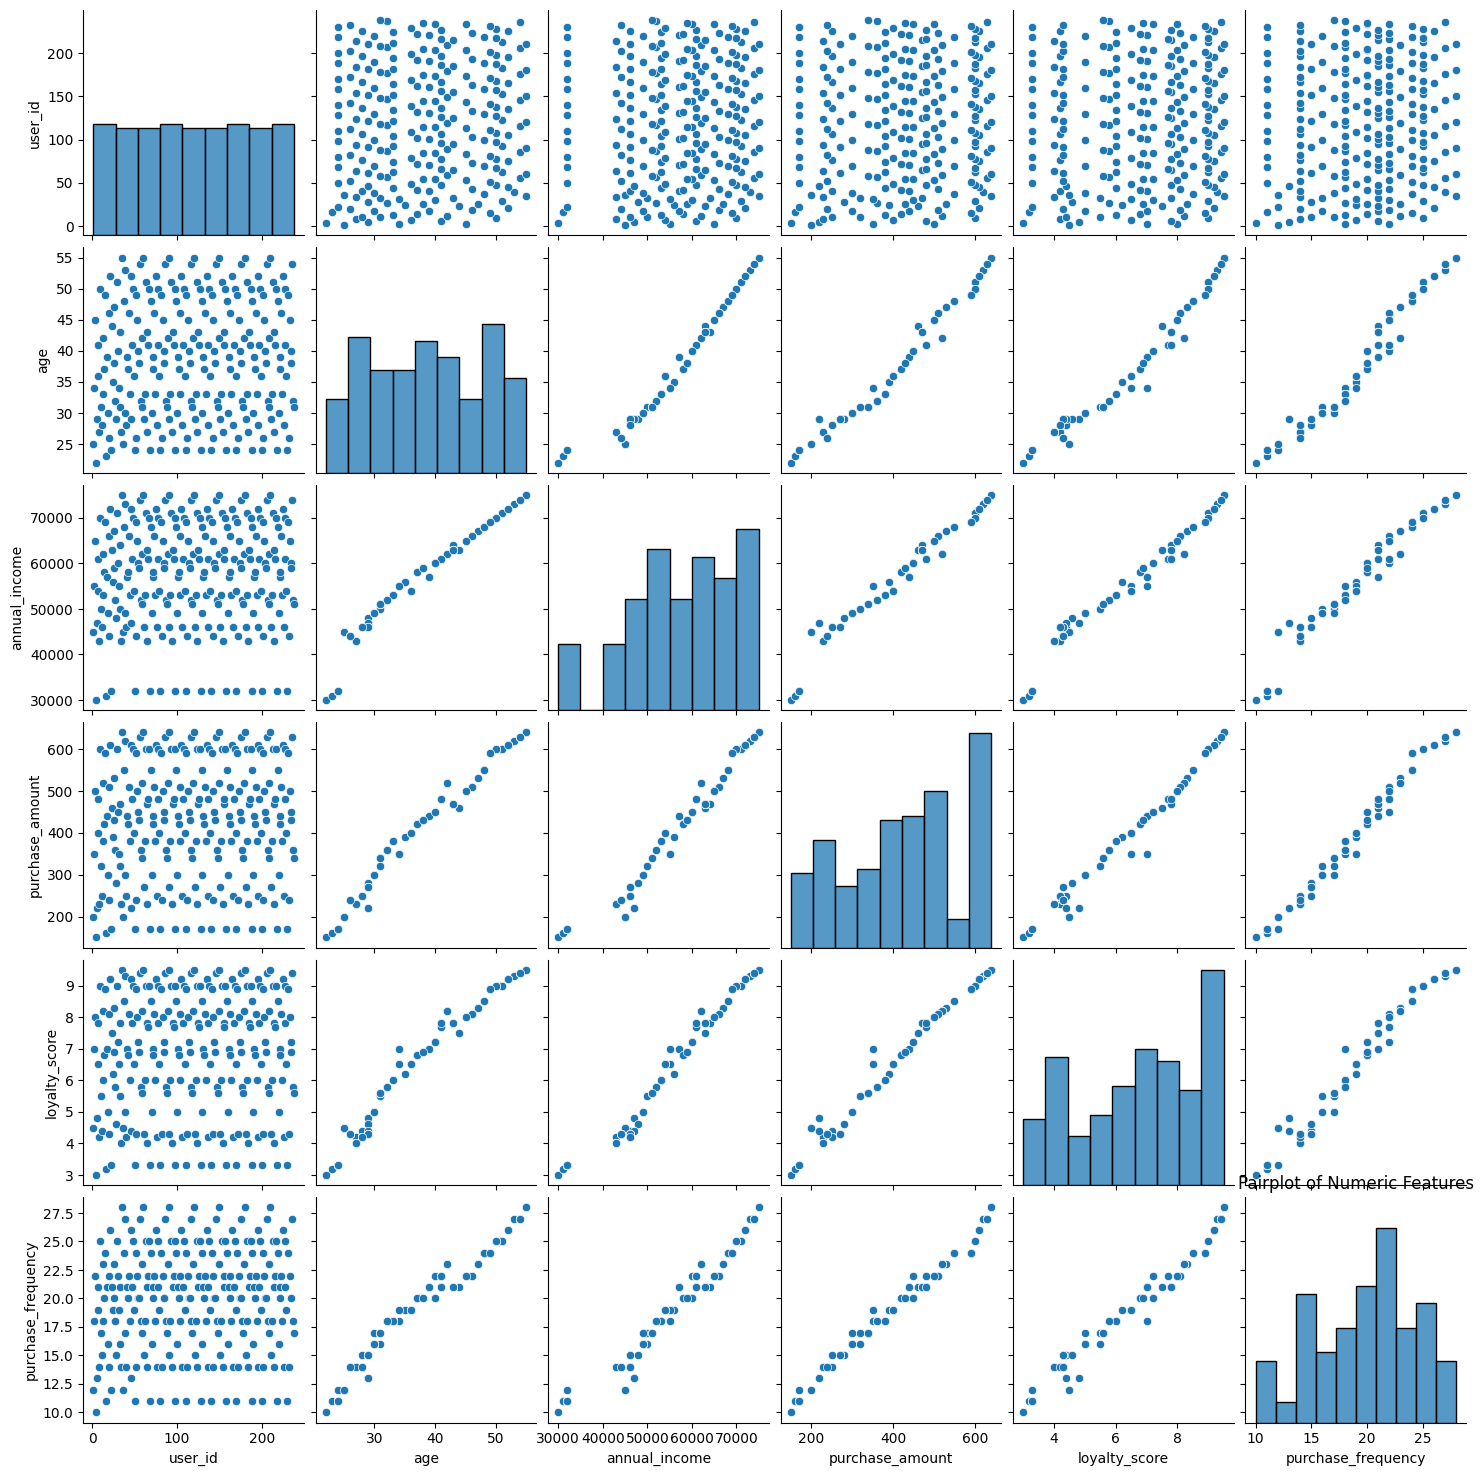

In [ ]:
# Pairplot to show pairwise relationships between all numeric variables
sns.pairplot(df.select_dtypes(include='number'))
plt.title('Pairplot of Numeric Features')
plt.show()


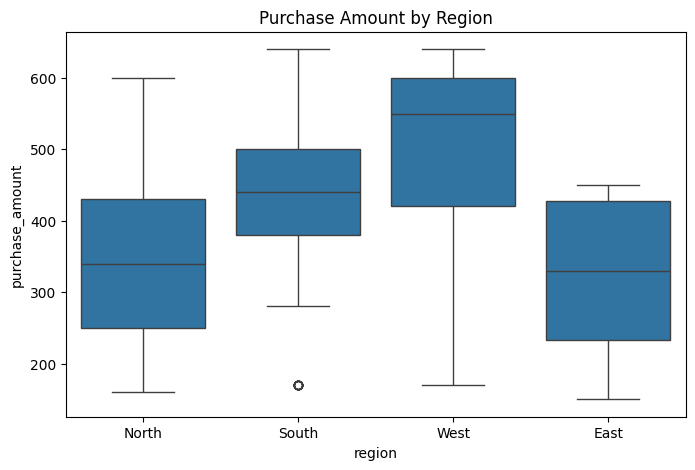

In [ ]:
# Boxplot to analyze purchase_amount by region
plt.figure(figsize=(8, 5))
sns.boxplot(x='region', y='purchase_amount', data=df)
plt.title('Purchase Amount by Region')
plt.show()


In [ ]:
# Pivot table summarizing mean purchase_amount and other metrics by region
pivot = df.pivot_table(values=['purchase_amount', 'loyalty_score'], index='region', aggfunc='mean')
print(pivot)


        loyalty_score  purchase_amount
region                                
East         5.400000       320.000000
North        5.865385       358.589744
South        6.725974       416.883117
West         7.911688       510.519481


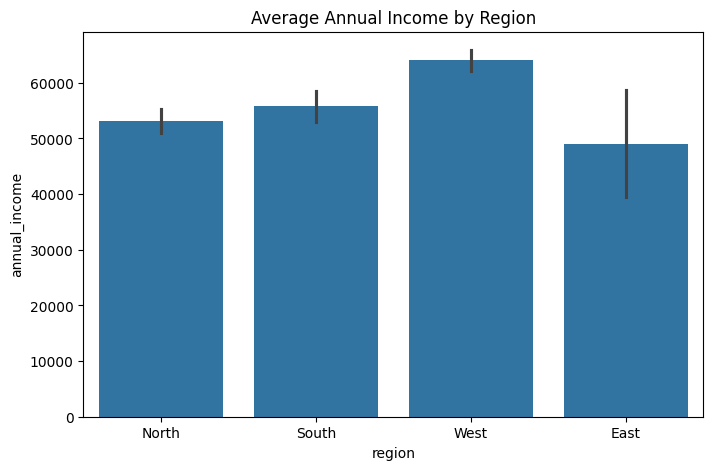

In [ ]:
# Bar plot showing average annual income per region
plt.figure(figsize=(8, 5))
sns.barplot(x='region', y='annual_income', data=df)
plt.title('Average Annual Income by Region')
plt.show()


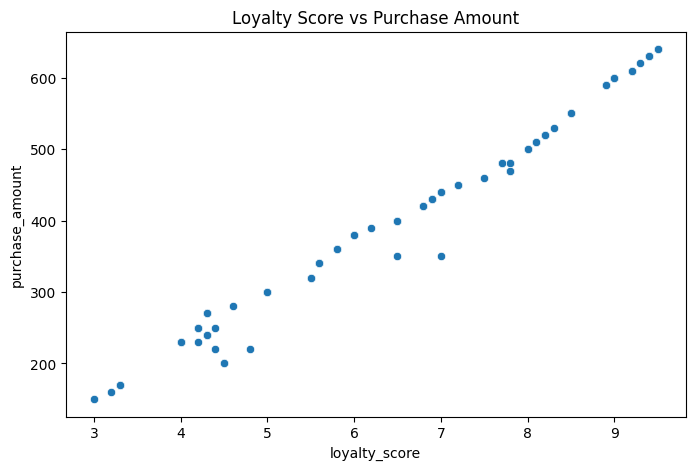

In [ ]:
# Scatter plot to check for potential outliers between purchase amount and loyalty score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='loyalty_score', y='purchase_amount', data=df)
plt.title('Loyalty Score vs Purchase Amount')
plt.show()


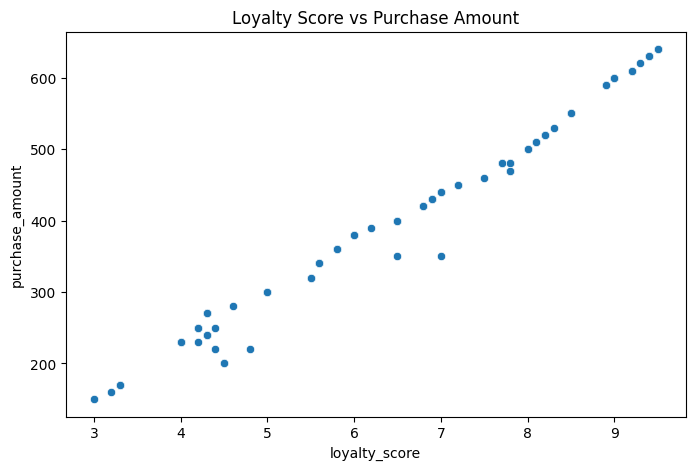

In [ ]:
# Scatter plot to check for potential outliers between purchase amount and loyalty score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='loyalty_score', y='purchase_amount', data=df)
plt.title('Loyalty Score vs Purchase Amount')
plt.show()


/var/folders/k6/g_ljv18502981l2_r91g117c0000gn/T/ipykernel_7810/2530827933.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['purchase_amount'], shade=True)


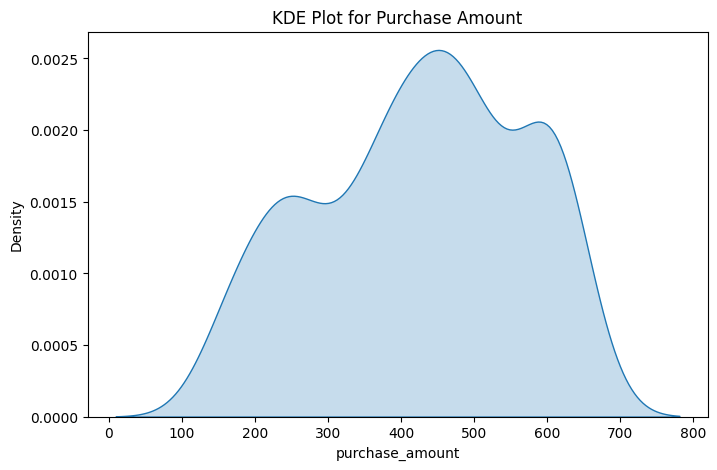

In [ ]:
# KDE plot for purchase amount
plt.figure(figsize=(8, 5))
sns.kdeplot(df['purchase_amount'], shade=True)
plt.title('KDE Plot for Purchase Amount')
plt.show()


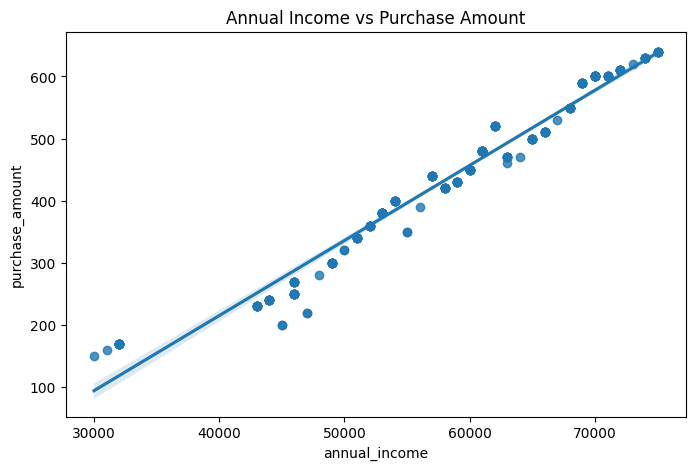

In [ ]:
# Regression plot for annual income vs purchase amount
plt.figure(figsize=(8, 5))
sns.regplot(x='annual_income', y='purchase_amount', data=df)
plt.title('Annual Income vs Purchase Amount')
plt.show()


In [ ]:
# Crosstab for region and purchase frequency (Example)
crosstab = pd.crosstab(df['region'], df['purchase_frequency'])
print(crosstab)


purchase_frequency  10  11  12  13  14  15  16  17  18  19  20  21  22  23  \
region                                                                       
East                 1   0   0   0   2   0   0   0   0   0   2   0   1   0   
North                0   1   1   2  21   6   6   7   1   8   7   1   8   1   
South                0  13   0   0   0   1   0   2  15   1   0  23   7   6   
West                 0   0   2   0   0   1   2   0   7   1  14   0   7   1   

purchase_frequency  24  25  26  27  28  
region                                  
East                 0   0   0   0   0  
North                1   7   0   0   0  
South                0   0   1   7   1  
West                14  14   7   1   6  


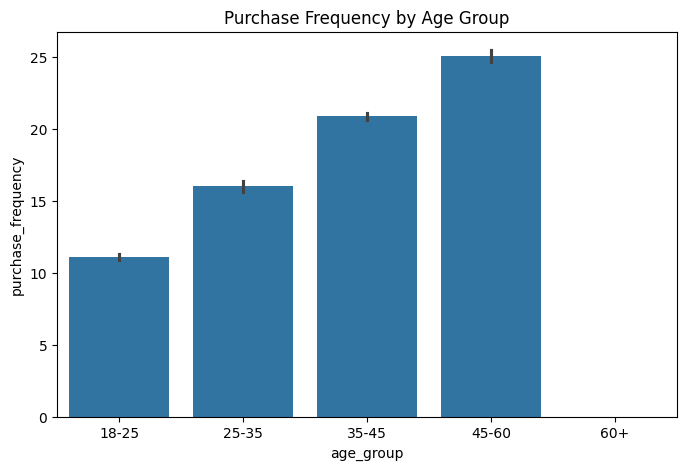

In [ ]:
# Bin ages into groups and analyze purchase frequency
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 60, 100], labels=['18-25', '25-35', '35-45', '45-60', '60+'])
plt.figure(figsize=(8, 5))
sns.barplot(x='age_group', y='purchase_frequency', data=df)
plt.title('Purchase Frequency by Age Group')
plt.show()
